In [1]:
import pandas
import datetime
import feather
import numpy
import scipy.optimize
import seaborn as sns
from davitpy import utils
from imagers.ssusi import ssusi_utils
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.dates import date2num, DateFormatter
%matplotlib inline
# import the sd-data overlay module
import os
import sys
module_path = os.path.abspath(os.path.join('../py/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import sd_scan_muh

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Some constants
eventDate = datetime.datetime(2016, 7, 25)#datetime.datetime(2011,5,16)
timeStart = datetime.datetime(2016, 7, 25, 3, 0)#datetime.datetime(2011,5,16,7,0)
timeEnd = datetime.datetime(2016, 7, 25, 7, 0)#datetime.datetime(2011,5,16,10,0)
sapsTime = datetime.datetime(2016, 7, 25, 5, 0)#datetime.datetime(2011,5,16,8,36)
# SD plot variables
sapsRadList = [ "cvw", "cve","fhw",\
               "fhe", "bks", "wal" ]#[ "cvw" ]
sddata_type = "raw_los" 
selBeam = 9
sapsMlatRange = [ 50., 62. ]#[ 56., 60. ]
sapsVelCutoff = 50.
sapsNpointsCutoff = 50 # per radar per beam
velScale = [ -500, 500 ]
# SSUSI plot variables
ssusiDir = "../data/dmsp/ssusi/prcsd/" # Make sure you have this dir or create it
ssusiTime = datetime.datetime( 2016, 7, 25, 4, 30 )
coords="mlt"
satList = ["F18" ]

In [3]:
# read velocities from the feather file
velsDF = feather.read_dataframe('../data/saps-' +\
                eventDate.strftime("%Y%m%d") + '.feather')
velsDF.head()

,dateStr,timeStr,beam,range,azimCalcMag,vLos,MLAT,MLON,MLT,GLAT,GLON,radId,radCode,date,normMLT
0,20160725,200,0,0,-31.8579,0.0000,38.6897,-146.2574,11.4109,43.7946,142.2906,41,hkw,2016-07-25 02:00:00,11.4109
1,20160725,200,0,1,-35.2038,0.0000,39.0370,-146.7567,11.3776,44.1381,141.7370,41,hkw,2016-07-25 02:00:00,11.3776
2,20160725,200,0,2,-37.7155,3.5175,39.3297,-147.2205,11.3467,44.4252,141.2232,41,hkw,2016-07-25 02:00:00,11.3467
3,20160725,200,0,3,-39.7328,6.5212,39.6014,-147.6740,11.3165,44.6902,140.7215,41,hkw,2016-07-25 02:00:00,11.3165
4,20160725,200,0,4,-41.4199,3.6386,39.8590,-148.1218,11.2866,44.9400,140.2269,41,hkw,2016-07-25 02:00:00,11.2866


In [4]:
# Read SSUSI data
ssObj = ssusi_utils.UtilsSsusi( ssusiDir, eventDate )
fDict = ssObj.filter_data_by_time(ssusiTime, timeDelta=40.)

reading data from---> ../data/dmsp/ssusi/prcsd/F18/20160725.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F17/20160725.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F16/20160725.txt


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


converting from geo to aacgm coordinates


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


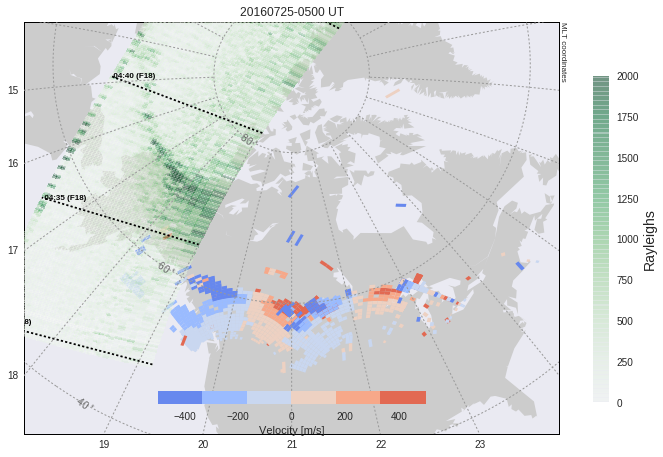

In [5]:

# PLOT DATA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj( coords=coords,\
                           lat_0=70., lon_0=-45, width=66e3*120,\
                           height=111e3*55, datetime=sapsTime)

# Overlay SD data
velSeaMap = ListedColormap( sns.color_palette("coolwarm") )
obj = sd_scan_muh.sdvel_on_map(m, ax, sapsRadList, sapsTime)
colNorm = Normalize( vmin=velScale[0], vmax=velScale[1] )
obj.overlay_raw_data(param="velocity", gsct=1,\
                     fill=True, vel_lim=velScale,\
                     zorder=4, cmap=velSeaMap, norm=colNorm, alpha=1.)
#Overlay SSUSI data
ssObj.overlay_sat_data( fDict, m, ax, satList=satList,\
         inpTime=ssusiTime, vmin=0., vmax=2000.,\
            autoScale=False, coords=coords,alpha=0.3,\
            cbar_shrink=0.75, titleString=sapsTime.strftime("%Y%m%d-%H%M") + " UT" )
cax = plt.colorbar(obj.losvel_mappable,ax=ax,cmap=velSeaMap,\
             orientation='horizontal', shrink=0.5, pad=-0.1)
cax.set_label('Velocity [m/s]')
fig.savefig("../plots/sd-ssusi-" +\
            sapsTime.strftime("%Y%m%d") +\
            ".pdf" ,bbox_inches='tight')